In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
path="C:\\Users\\HP\\Documents\\corona.csv"

In [3]:
data=pd.read_csv(path)

C:\Users\HP\AppData\Local\Temp\ipykernel_5468\3552011847.py:1: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(path)


In [7]:
data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [9]:
data["Cough_symptoms"].unique()

array([True, False, nan], dtype=object)

In [11]:
data["Fever"].unique()

array([False, True, nan], dtype=object)

In [13]:
data["Sore_throat"].unique()

array([True, False, nan], dtype=object)

In [15]:
data["Shortness_of_breath"].unique()

array([False, True, nan], dtype=object)

In [17]:
data["Headache"].unique()

array([False, True, nan], dtype=object)

In [19]:
data["Corona"].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [21]:
data["Age_60_above"].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [23]:
data["Sex"].unique()

array([nan, 'male', 'female'], dtype=object)

In [25]:
data["Known_contact"].unique()

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [27]:
data["Test_date"].unique()

array(['11-03-2020', '12-03-2020', '13-03-2020', '14-03-2020',
       '15-03-2020', '16-03-2020', '17-03-2020', '18-03-2020',
       '19-03-2020', '20-03-2020', '21-03-2020', '22-03-2020',
       '23-03-2020', '24-03-2020', '25-03-2020', '26-03-2020',
       '27-03-2020', '28-03-2020', '29-03-2020', '30-03-2020',
       '31-03-2020', '01-04-2020', '02-04-2020', '03-04-2020',
       '04-04-2020', '05-04-2020', '06-04-2020', '07-04-2020',
       '08-04-2020', '09-04-2020', '10-04-2020', '11-04-2020',
       '12-04-2020', '13-04-2020', '14-04-2020', '15-04-2020',
       '16-04-2020', '17-04-2020', '18-04-2020', '19-04-2020',
       '20-04-2020', '21-04-2020', '22-04-2020', '23-04-2020',
       '24-04-2020', '25-04-2020', '26-04-2020', '27-04-2020',
       '28-04-2020', '29-04-2020', '30-04-2020'], dtype=object)

In [29]:
data.isnull().sum() #checking out null values

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [31]:
len(data)

278848

In [33]:
data2=data.dropna()

In [35]:
data2.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,22-03-2020,True,False,False,False,False,negative,No,male,Abroad
13728,13729,22-03-2020,True,False,False,False,False,negative,No,female,Abroad
13730,13731,22-03-2020,True,True,False,False,False,positive,Yes,female,Other
13731,13732,22-03-2020,False,False,False,False,False,other,No,female,Other
13732,13733,22-03-2020,False,False,False,False,False,other,No,female,Other


In [37]:
len(data2)

138172

In [39]:
encode_data=LabelEncoder() #changing the words to numbers

In [41]:
data3=pd.DataFrame()

In [43]:
data3["Cough_symptoms"]=encode_data.fit_transform(data2.Cough_symptoms)
data3["Fever"]=encode_data.fit_transform(data2.Fever)
data3["Sore_throat"]=encode_data.fit_transform(data2.Sore_throat)
data3["Shortness_of_breath"]=encode_data.fit_transform(data2.Shortness_of_breath)
data3["Headache"]=encode_data.fit_transform(data2.Headache)
data3["Corona"]=encode_data.fit_transform(data2.Corona)
data3["Age_60_above"]=encode_data.fit_transform(data2.Age_60_above)
data3["Sex"]=encode_data.fit_transform(data2.Sex)
data3["Known_contact"]=encode_data.fit_transform(data2.Known_contact)

In [44]:
data3.head(2)

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0


In [47]:
data3.isnull().sum()

Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [49]:
data3.Headache.unique()

array([0, 1])

In [51]:
X=data3[["Cough_symptoms","Fever","Sore_throat","Shortness_of_breath","Headache","Age_60_above","Sex","Known_contact"]]
Y=data3["Corona"]

In [53]:
x_test,x_train,y_test,y_train=train_test_split(X,Y,test_size=0.20)

In [55]:
model=RandomForestClassifier()

In [57]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
model.score(x_test,y_test)

0.9444801288256421

In [59]:
prediction=model.predict(x_test)

In [61]:
y_test.head()

63761     0
39050     0
44619     0
125659    0
109414    0
Name: Corona, dtype: int32

In [62]:
corr=data3.corr()

<Axes: >

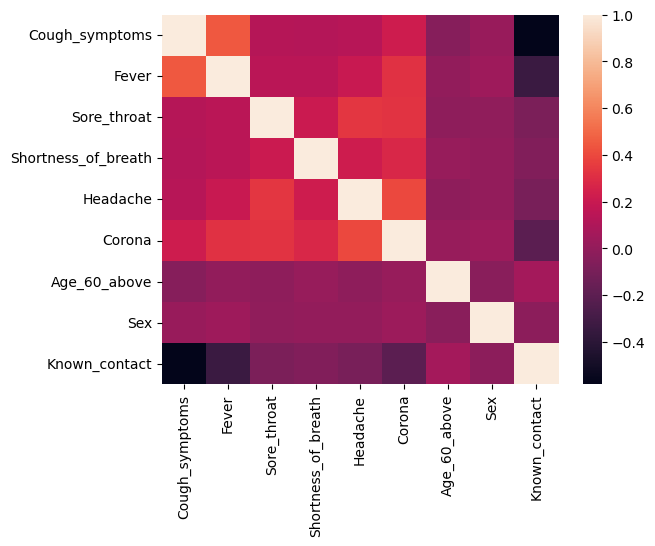

In [64]:
sns.heatmap(corr)

In [65]:
test_data=pd.concat([x_test,y_test],axis="columns") #join the predicted values with the test values

In [69]:
test_data["Predicted_values"]=prediction

In [73]:
test_data.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona,Predicted_values
63761,0,0,0,0,0,0,0,2,0,0
39050,0,0,0,0,0,0,0,2,0,0
44619,0,0,0,0,0,0,1,2,0,0
125659,1,1,0,0,0,0,0,0,0,0
109414,0,0,0,0,0,1,0,2,0,0


In [75]:
pd.crosstab(test_data["Corona"], test_data["Predicted_values"], margins=True) #cross tabulation to compare between Corona status and the predicted values

Predicted_values,0,1,2,All
Corona,,,,
0,99538,0,1022,100560
1,1387,0,94,1481
2,3615,19,4862,8496
All,104540,19,5978,110537


In [77]:
len(data3)

138172

In [79]:
len(test_data)

110537

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [83]:
kf=KFold(n_splits=3, shuffle=True) #cross validation score-to check out the best model

In [85]:
decision_tree=cross_val_score(DecisionTreeClassifier(),X,Y,cv=kf)

In [87]:
decision_tree

array([0.94517782, 0.94415615, 0.94485095])

In [89]:
ks=StratifiedKFold(n_splits=3, shuffle=True)

In [91]:
decision_score=cross_val_score(DecisionTreeClassifier(),X,Y,cv=ks)

In [92]:
decision_score

array([0.94472187, 0.94446013, 0.94524177])

In [95]:
rf_score=cross_val_score(RandomForestClassifier(n_estimators=40), X,Y, cv=ks)

In [96]:
rf_score

array([0.94489557, 0.94524177, 0.94480752])

In [97]:
svc_score=cross_val_score(SVC(C=10), X,Y,cv=ks)

In [100]:
svc_score

array([0.94430935, 0.94613197, 0.94515492])

In [101]:
GAU=cross_val_score(GaussianNB(), X,Y,cv=ks)

In [102]:
GAU

array([0.93230275, 0.93078142, 0.93219272])

In [103]:
MMB=cross_val_score(MultinomialNB(), X,Y,cv=ks)

In [104]:
MMB

array([0.92203309, 0.92266105, 0.92481056])

In [105]:
Logistics=cross_val_score(LogisticRegression(), X,Y,cv=ks)

In [106]:
Logistics

array([0.93084806, 0.93290922, 0.93240984])

In [107]:
average_rf_score=np.average(rf_score) #checking the average of each model scores
average_svc_score=np.average(svc_score)
average_ds_score=np.average(decision_score)
average_Logistics=np.average(Logistics)
average_MMB_score=np.average(MMB)
average_GAU_score=np.average(GAU)

In [108]:
average_ds_score

0.9448079211855424

In [109]:
#puttting the scores in a data frame
modelscore={
    "model names":["Decision tree", "Random forest", "SVC", "GAUSSIAN", "Multinomial", "Logistics"],
    "score 1":[GAU[0], rf_score[0], svc_score[0], decision_score[0], Logistics[0], MMB[0]],
    "score 2":[GAU[1], rf_score[1], svc_score[1], decision_score[1], Logistics[1], MMB[1]],
    "score 3":[GAU[2], rf_score[2], svc_score[2], decision_score[2], Logistics[2], MMB[2]],
    "Average":[average_Logistics, average_rf_score, average_svc_score, average_MMB_score, average_GAU_score, average_ds_score]

}

In [110]:
pd.DataFrame(modelscore)

,model names,score 1,score 2,score 3,Average
0,Decision tree,0.932303,0.930781,0.932193,0.932056
1,Random forest,0.944896,0.945242,0.944808,0.944982
2,SVC,0.944309,0.946132,0.945155,0.945199
3,GAUSSIAN,0.944722,0.944460,0.945242,0.923168
4,Multinomial,0.930848,0.932909,0.932410,0.931759
5,Logistics,0.922033,0.922661,0.924811,0.944808


In [111]:
data_test_class0=data3[data3["Corona"]==0]
data_test_class1=data3[data3["Corona"]==1]
data_test_class2=data3[data3["Corona"]==2]

In [112]:
data_test_class1.head()


,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
3,0,0,0,0,0,1,0,0,2
4,0,0,0,0,0,1,0,0,2
13,0,0,0,0,0,1,0,0,2
15,0,0,0,0,0,1,0,0,2
75,0,0,0,0,0,1,0,1,2


In [113]:
x1=data_test_class0["Age_60_above"]
y1=data_test_class0["Known_contact"]

x2=data_test_class1["Age_60_above"]
y2=data_test_class1["Known_contact"]

x3=data_test_class2["Age_60_above"]
y3=data_test_class2["Known_contact"]

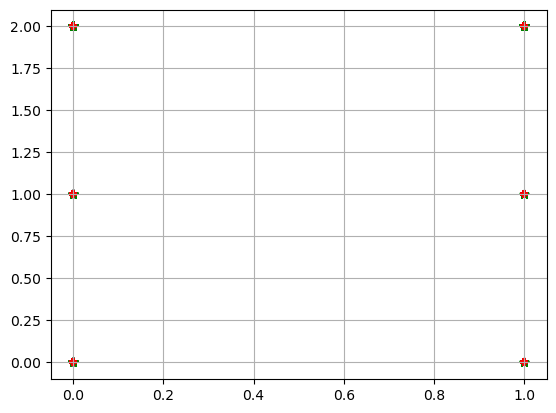

In [114]:
plt.scatter(x1,y1,color="blue",marker="+")
plt.scatter(x2,y2,color="green",marker="*")
plt.scatter(x3,y3,color="red", marker="+")
plt.grid()
plt.show()

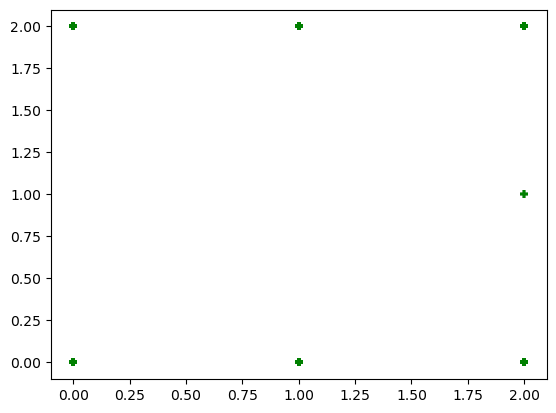

In [115]:
x=test_data[["Corona"]]
y=test_data["Predicted_values"]
plt.scatter(x,y,marker="+",color="green")
plt.show()

In [135]:
data3.to_csv("C:\\Users\\HP\\Documents\\full_project.csv")

In [145]:
import nbconvert


In [153]:
#dir(nbconvert)

In [155]:
from nbconvert import PDFExporter

In [157]:
convert=PDFExporter()